<a href="https://colab.research.google.com/github/daheeem/Artificial-Neural-Network/blob/main/Multi_Layer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi Layer Perceptron with Tensor Flow

# FORMULASI MASALAH

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Import Data

In [ ]:
#Mengimport data dari file Trial.xlsx
from google.colab import files
TheFile = files.upload()

Saving trial.csv to trial.csv


In [ ]:
df = pd.read_csv('trial.csv')

# Pra-Pemrosesan Data


In [ ]:
df['Money_Value'].fillna(df['Money_Value'].mean(), inplace = True)

In [ ]:
df = df[(df.LOCATION_ID != 'LOHARU')]
df = df[(df.LOCATION_ID != 'NUH')]
df = df[(df.LOCATION_ID != 'SAFIDON')]
df = df.astype(float)

In [ ]:
df.duplicated()
df= df.drop_duplicates()

more_than:  0      False
1      False
2      False
3      False
4      False
       ...  
770    False
772    False
773    False
774    False
775    False
Name: Money_Value, Length: 760, dtype: bool  | less_than:  0      False
1      False
2      False
3      False
4      False
       ...  
770    False
772    False
773    False
774    False
775    False
Name: Money_Value, Length: 760, dtype: bool
more_than:  0      False
1      False
2      False
3      False
4      False
       ...  
770    False
772    False
773    False
774    False
775    False
Name: TOTAL, Length: 760, dtype: bool  | less_than:  0      False
1      False
2      False
3      False
4      False
       ...  
770    False
772    False
773    False
774    False
775    False
Name: TOTAL, Length: 760, dtype: bool
more_than:  0      False
1      False
2      False
3      False
4      False
       ...  
770    False
772    False
773    False
774    False
775    False
Name: PARA_A, Length: 760, dtype: bool  | less_than:  0

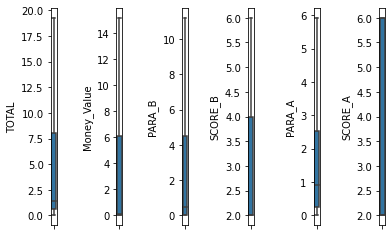

In [ ]:
def interquartile(data,x):
  q1 = (data[x]).quantile(0.25)
  q3 = (data[x]).quantile(0.75) 
  iqr = q3 - q1
  maximum = q3 + (1.5 *iqr)
  minimum = q1 - (1.5 *iqr)
  return maximum,minimum

# menggantikan value outliners dengan hasil dari perhitungan jarak interquartile
def sub_outliners(data,x,maximum,minimum):
  more_than = (data[x] > maximum)
  less_than = (data[x] < minimum)
  print('more_than: ',more_than,' | less_than: ',less_than)
  data[x] = data[x].mask(more_than, maximum,axis=0)
  data[x] = data[x].mask(less_than, minimum,axis=0)
  return data

maximum,minimum = interquartile(df,'Money_Value')
df = sub_outliners(df,'Money_Value',maximum,minimum)

maximum,minimum = interquartile(df,'TOTAL')
df = sub_outliners(df,'TOTAL',maximum,minimum)

maximum,minimum = interquartile(df,'PARA_A')
df = sub_outliners(df,'PARA_A',maximum,minimum)

maximum,minimum = interquartile(df,'PARA_B')
df = sub_outliners(df,'PARA_B',maximum,minimum)

f, a = plt.subplots(1, 6)
mp.rcParams['figure.dpi'] = 120

sns.boxplot(y=df["TOTAL"], ax=a[0])
sns.boxplot(y=df["Money_Value"], ax=a[1])
sns.boxplot(y=df["PARA_B"], ax=a[2])
sns.boxplot(y=df["SCORE_B"], ax=a[3])
sns.boxplot(y=df["PARA_A"], ax=a[4])
sns.boxplot(y=df["SCORE_A"], ax=a[5])
plt.subplots_adjust(wspace=10)


In [ ]:
y = df.Risk
data_df = df.drop(['Risk'], axis = 1)

#Validasi Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_train, df_test, y_train, y_test = train_test_split(data_df,y, test_size = 0.2)
df_train_scaled = scaler.fit_transform(df_train)
df_test_scaled = scaler.transform(df_test)

#Reduksi Dimensi




In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

df_train_reduced = pca.fit_transform(df_train_scaled)
df_test_reduced = pca.transform(df_test_scaled)

print(df_test_reduced)

[[ 1.41922611]
 [ 2.79611226]
 [-0.51232941]
 [-1.86790087]
 [ 4.70199027]
 [-1.70472822]
 [-0.2188212 ]
 [-1.08114878]
 [-2.08157924]
 [-0.936286  ]
 [-2.19201963]
 [-1.86351623]
 [-0.85838401]
 [ 3.41400072]
 [ 4.15059903]
 [ 7.43337875]
 [ 6.57388714]
 [ 0.36929677]
 [-1.73137434]
 [ 0.05000239]
 [-1.81876736]
 [ 3.38314641]
 [ 0.91247062]
 [-1.51726486]
 [-2.27719862]
 [-1.8409768 ]
 [-1.97800722]
 [ 2.33094895]
 [-1.42339047]
 [-2.12308941]
 [-1.91369328]
 [-2.33446292]
 [-1.88103182]
 [-0.87996321]
 [ 0.94332348]
 [-2.35189242]
 [-1.79073254]
 [-2.14102241]
 [-2.02003578]
 [ 5.98545677]
 [-0.59579355]
 [-2.30095928]
 [-1.3540638 ]
 [-1.47584112]
 [ 5.41437011]
 [ 1.03105817]
 [ 8.0504117 ]
 [ 1.66253032]
 [-1.74385362]
 [-2.27478332]
 [-1.87065621]
 [ 2.12783698]
 [-2.21656119]
 [ 4.15748353]
 [ 1.36505297]
 [-0.59745247]
 [ 1.1369537 ]
 [-2.34988587]
 [-1.74681147]
 [ 5.58141114]
 [ 5.4452572 ]
 [-1.9063025 ]
 [-2.06181691]
 [-1.23898048]
 [ 3.77497536]
 [-1.63382269]
 [-2.01335

#DATA MODELLING

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential (
    [
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(64),
        tf.keras.layers.Dense(32),
        tf.keras.layers.Dense(16),    
        tf.keras.layers.Dense(4),        
        tf.keras.layers.Dense(2),        
        tf.keras.layers.Dense(1, activation = 'sigmoid'),
    ]
)

model.compile(loss = 'binary_crossentropy', optimizer = tf.optimizers.Adam(learning_rate=0.05), metrics = ['accuracy', 'Precision', 'Recall'])

In [ ]:
target = 0.9
class callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') >= target:
            print('\nFor Epoch', epoch, '\nAkurasi telah mencapai = %2.2f%%' %(logs['accuracy']*100), 'proses training selesai.')
            self.model.stop_training = True
callback = callbacks()

In [ ]:
history = model.fit(df_train_reduced, y_train, epochs = 1000, callbacks=[callback])

Epoch 1/1000
19/19 [==============================] - 2s 4ms/step - loss: 0.8370 - accuracy: 0.6875 - precision: 0.7162 - recall: 0.8390
Epoch 2/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.2467 - accuracy: 0.9688 - precision: 1.0000 - recall: 0.9600
For Epoch 1 
Akurasi telah mencapai = 94.24% proses training selesai.
19/19 [==============================] - 0s 3ms/step - loss: 0.1707 - accuracy: 0.9424 - precision: 0.9781 - recall: 0.9299


#Data Testing

In [ ]:
y_train_pred = model.predict(df_train_reduced)
y_test_pred = model.predict(df_test_reduced)

5/5 [==============================] - 0s 4ms/step


In [ ]:
y_train_pred_class = [1 if prob > 0.5 else 0 for prob in np.ravel(y_train_pred)]
y_test_pred_class = [1 if prob > 0.5 else 0 for prob in np.ravel(y_test_pred)]

#Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train,y_train_pred_class))
print(confusion_matrix(y_test,y_test_pred_class))

[[185  38]
 [ 12 373]]
[[46  6]
 [ 2 98]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(f'Accuracy : {accuracy_score(y_test, y_test_pred_class)*100:.2f}%')
print(f'Precision : {precision_score(y_test, y_test_pred_class)*100:.2f}%')
print(f'Recall : {recall_score(y_test, y_test_pred_class)*100:.2f}%')

Accuracy : 94.74%
Precision : 94.23%
Recall : 98.00%
